In [1]:
import os
import requests
import pandas as pd
import duckdb
import numpy as np
import matplotlib.pyplot as plt

## SHOW TABLES

In [7]:
#creates DB if does not exist, else use to test table names created

sql_query = '''
show all tables
'''

with duckdb.connect('data/person_of_influence.db') as con:
    display(con.sql(sql_query).df())

,database,schema,name,column_names,column_types,temporary
0,person_of_influence,main,poi_hist,"[name, num_cats, best_cat_rnk, bst_cat, dt]","[VARCHAR, BIGINT, BIGINT, VARCHAR, DATE]",False
1,person_of_influence,main,poi_stage,"[name, num_cats, bst_cat_rnk, bst_cat, dt]","[VARCHAR, BIGINT, BIGINT, VARCHAR, DATE]",False
2,person_of_influence,main,poi_test,"[dt, num_rows]","[DATE, BIGINT]",False
3,person_of_influence,main,poi_top_curr,"[name, num_cats, best_cat_rnk]","[VARCHAR, BIGINT, BIGINT]",False


## POI STAGE

In [78]:

sql_query = '''
select * from poi_stage limit 100
'''

with duckdb.connect('data/person_of_influence.db') as con:
    display(con.sql(sql_query).df())


,name,num_cats,bst_cat_rnk,bst_cat,dt
0,50 Cent,1,142,Actor,2025-03-22
1,A$AP Rocky,1,479,Actor,2025-03-22
2,A. J. Brown,1,166,NFL,2025-03-22
3,AJ Dillon,1,281,NFL,2025-03-22
4,AJ Griffin,1,452,NBA,2025-03-22
...,...,...,...,...,...
95,Ali Biçim,1,361,Influencer,2025-03-22
96,Ali Khamenei,1,196,Politician,2025-03-22
97,Alia Bhatt,1,432,Actor,2025-03-22
98,Alice Guo,1,162,Politician,2025-03-22


In [64]:
sql_query = '''
describe poi_stage
'''

with duckdb.connect('data/person_of_influence.db') as con:
    display(con.sql(sql_query).df())


,column_name,column_type,null,key,default,extra
0,name,VARCHAR,YES,None,None,None
1,num_cats,BIGINT,YES,None,None,None
2,bst_cat_rnk,BIGINT,YES,None,None,None
3,bst_cat,VARCHAR,YES,None,None,None
4,dt,DATE,YES,None,None,None


## POI HIST

In [2]:

sql_query = '''
select
    dt,
    count(*) as num_rows
from poi_hist
group by dt
order by dt
'''

with duckdb.connect('data/person_of_influence.db') as con:
    display(con.sql(sql_query).df())

,dt,num_rows
0,2025-03-22,2688
1,2025-03-24,2686


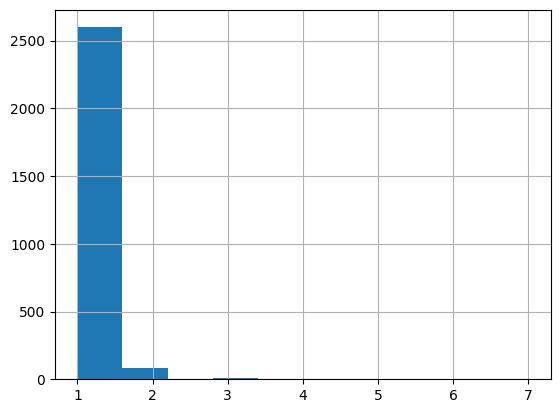

In [83]:
sql_query = '''
select *
from poi_hist
WHERE dt = (select max(dt) from poi_hist)
'''

with duckdb.connect('data/person_of_influence.db') as con:
    df = con.sql(sql_query).df()

df['num_cats'].hist()
plt.show()

## POI TEST

In [3]:
sql_query = '''
select *
from poi_test
'''

with duckdb.connect('data/person_of_influence.db') as con:
    display(con.sql(sql_query).df())

,dt,num_rows
0,2025-03-24,2686


## POI TOP CURR

In [4]:
sql_query = '''
select *
from poi_top_curr
'''

with duckdb.connect('data/person_of_influence.db') as con:
    display(con.sql(sql_query).df())

,name,num_cats,best_cat_rnk
0,Actor,7,14
1,Adolf Hitler,2,89
2,Ahmad Crypto,2,48
3,Al Michaels,2,354
4,Andrew Tate,2,11
...,...,...,...
380,Xavier Worthy,1,45
381,Xing Billionaire,1,49
382,YoungBoy Never Broke Again,1,0
383,Yua Mikami,1,17


## DELETE/DROP/RESET 

In [74]:
sql_query = '''
drop table poi_test
'''

with duckdb.connect('data/person_of_influence.db') as con:
    con.sql(sql_query)